# CAPSTONE FINAL PROJECT
## Team members:
1. Trieu Vo
2. Nilay Anand
3. Yash Tadiyal
4. Ashu Kumar Singh
5. Rohit Meena

## INTRODUCTION

## DATA SOURCE
We chose to utilize the dataset from Inside Airbnb. Our dataset contains nearly 207,000 data samples from 28 cities in the United States. We also select 15 features that we believe will be valuable to examine.

## IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
!pip install plotly
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

!pip install geopy
import geopy
# Install Geopandas
# !pip install geopandas
!pip install git+git://github.com/geopandas/geopandas.git

import geopandas as gpd
from shapely.geometry import Point

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-hv1c9uc2
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-hv1c9uc2
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 19.4 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+1.g409d8f0-py2.py3-none-any.whl size=1031538 sha256=5c7240c7c91e4c7c5461a253f13dac10ca4171b279f5b3fa7289fe81e1ab9890
  Stored in directory: /tmp/pip-ephem-wheel-cache-3695jtbv/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


## LOADING DATA

#### Prepare listing links to get the data:

In [ ]:
listing_links = ["http://data.insideairbnb.com/united-states/nc/asheville/2021-09-16/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/tx/austin/2021-09-14/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ma/boston/2021-09-19/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/fl/broward-county/2021-09-27/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ma/cambridge/2021-09-29/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/il/chicago/2021-09-16/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/nv/clark-county-nv/2021-09-21/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/oh/columbus/2021-09-27/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/co/denver/2021-09-30/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/hi/hawaii/2021-09-12/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/nj/jersey-city/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/los-angeles/2021-09-08/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/tn/nashville/2021-09-21/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/la/new-orleans/2021-09-08/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ny/new-york-city/2021-09-01/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/oakland/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/pacific-grove/2021-09-30/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/or/portland/2021-09-24/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ri/rhode-island/2021-09-30/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/or/salem-or/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/san-diego/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/san-francisco/2021-09-01/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/san-mateo-county/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/santa-clara-county/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/ca/santa-cruz-county/2021-09-30/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/wa/seattle/2021-09-25/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/mn/twin-cities-msa/2021-09-24/data/listings.csv.gz",
"http://data.insideairbnb.com/united-states/dc/washington-dc/2021-09-16/data/listings.csv.gz"]

#### Append the listings from different citites:

In [ ]:
listing_df = pd.DataFrame()
for link in listing_links:
    city_df = pd.read_csv(filepath_or_buffer = link, header = 0)
    listing_df = listing_df.append(city_df)

#### The shape of the listings dataframe:

In [ ]:
listing_df.shape

(207006, 74)

#### Reset the index of the listings after appending:

In [ ]:
listing_df = listing_df.reset_index(drop = True)

#### Take a look at the first samples in the data:

In [ ]:
display(listing_df.head())

id  ... reviews_per_month
0  108061  ...              0.73
1  155305  ...              5.43
2  156805  ...              2.80
3  156926  ...              3.42
4  160594  ...              0.48

[5 rows x 74 columns]

#### Convert the price from string to float to make it easier to evaluate later:

In [ ]:
listing_df['price'] = listing_df['price'].str.replace(',', '')
listing_df['price'] = listing_df['price'].str.replace('$', '')
listing_df['price'] = listing_df['price'].astype(float)

#### Add zipcode to the listing_df:

Load the zipcode file:

In [ ]:
url = 'https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data'
zipcode_df = pd.read_csv(url, header = 0)

In [ ]:
zipcode_df.head()

ZIP        LAT        LNG
0  601  18.180555 -66.749961
1  602  18.361945 -67.175597
2  603  18.455183 -67.119887
3  606  18.158345 -66.932911
4  610  18.295366 -67.125135

Train the K-Nearest Neighbors model to get the zipcode:

In [ ]:
X = zipcode_df.drop(["ZIP"], axis = 1)

y = zipcode_df["ZIP"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

y_train_preds = knn.predict(X_train)
y_test_preds = knn.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('K-Nearest Neighbors MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('K-Nearest Neighbors R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

K-Nearest Neighbors MSE train: 0.000, test: 0.000
K-Nearest Neighbors R^2 train: 1.000, test: 1.000


Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

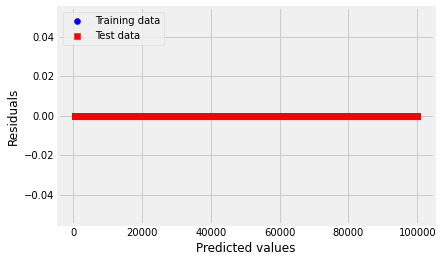

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

Check on several latitude, longitude:

In [ ]:
X_test_preds_1 = np.array([[35.60670, -82.55563], [35.57864,	-82.59578], [36.11441, -115.19907], [41.89230,	-87.62734], [37.00939,	-121.88547], [19.49577,	-155.15019], [37.63542,	-122.47707], [32.72394,	-117.12960], [36.62475, -121.93491], [34.09261, -118.86987], [42.33570, -71.05395], [36.96805,	-121.90045]])

In [ ]:
X_test_preds_1.shape

(12, 2)

In [ ]:
result_df = pd.DataFrame()
result_df['result'] = knn.predict(X_test_preds_1)
result_df

result
0    28801
1    28806
2    89103
3    60601
4    95003
5    96771
6    94044
7    92102
8    93950
9    90265
10    2127
11   95003

Check again by calling geopy (but this function costs a lot of time):

In [ ]:
result_df_2 = pd.DataFrame()
geolocator = geopy.Nominatim(user_agent='vohaitrieu.9396@gmail.com')
for i in range(len(X_test_preds_1)):
  lat_long_pair = X_test_preds_1[i, :]
  try:
    location = geolocator.reverse((lat_long_pair))
    zipcode = location.raw['address']['postcode']
  except:
    zipcode = np.nan
  result_df_2 = result_df_2.append({'geopy_result': zipcode}, ignore_index=True)

Compare results:

In [ ]:
result_df_2['predicted_result'] = result_df

In [ ]:
result_df_2

geopy_result  predicted_result
0         28801             28801
1         28806             28806
2    89103-4009             89103
3         60611             60601
4         95003             95003
5         96771             96771
6         94044             94044
7         92102             92102
8         93950             93950
9           NaN             90265
10        01125              2127
11        95003             95003

## --> 60611 and 60601 is next to each other in reality.

## --> Check 01125 on zipcode finding websites, but it is an invalid zipcode --> Geopy is wrong
https://www.getzips.com/zip.htm

https://tools.usps.com/zip-code-lookup.htm?citybyzipcode

https://www.unitedstateszipcodes.org/

Add zipcode to the listing_df:

In [ ]:
lat_long_df = listing_df[['latitude', 'longitude']]
display(lat_long_df.shape)
display(lat_long_df.head())

(207006, 2)

latitude  longitude
0  35.60670  -82.55563
1  35.57864  -82.59578
2  35.57864  -82.59578
3  35.57864  -82.59578
4  35.61442  -82.54127

In [ ]:
zipcode_df = pd.DataFrame()
zipcode_df['zipcode'] = knn.predict(lat_long_df)
display(zipcode_df.shape)

(207006, 1)

In [ ]:
zipcode_df.head()

zipcode
0    28801
1    28806
2    28806
3    28806
4    28801

Convert zipcode from int to string and fill with leading zeros:

In [ ]:
zipcode_df = zipcode_df.astype(str)
zipcode_df['zipcode'] = zipcode_df['zipcode'].apply(lambda x: x.zfill(5)) # fill zipcode with leading zeros

In [ ]:
zipcode_df.head()

zipcode
0   28801
1   28806
2   28806
3   28806
4   28801

In [ ]:
listing_df.insert(0, 'zipcode', zipcode_df)

#### Take a look at the price of the first samples in the data after converting:

In [ ]:
display(listing_df.head())

zipcode  ...  reviews_per_month
0   28801  ...               0.73
1   28806  ...               5.43
2   28806  ...               2.80
3   28806  ...               3.42
4   28801  ...               0.48

[5 rows x 75 columns]

#### Show the statistics of each feature in the listings dataset:

In [ ]:
display(listing_df.describe())

id  ...  reviews_per_month
count  2.070060e+05  ...      164137.000000
mean   3.142877e+07  ...           2.637133
std    1.588514e+07  ...           6.607274
min    1.090000e+02  ...           0.010000
25%    1.842391e+07  ...           0.320000
50%    3.390894e+07  ...           1.070000
75%    4.626152e+07  ...           2.890000
max    5.252932e+07  ...         493.000000

[8 rows x 40 columns]

#### Calculate the total number of listings and the total number of hosts:

In [ ]:
listings_number = listing_df['id'].count()
hosts_number = len(listing_df['host_id'].unique())

print(f'The dataset contains information on {listings_number} listings provided by {hosts_number} hosts.')

The dataset contains information on 207006 listings provided by 109766 hosts.


## --> The dataset contains information on 207006 listings provided by 109766 hosts.

## ------------------------------------ EVALUATE MISSING VALUES TO SELECT FEATURES ------------------------------------

#### Calculate the data type, the number of missing values and the percentage of missing values of each feature to select features efficiently:

In [ ]:
column_df = pd.DataFrame()
column_df['feature'] = listing_df.columns
column_df['data_type'] = listing_df.dtypes.values
column_df['number_of_missing_values'] = listing_df.isnull().sum().values
column_df['missing_values_percentage'] = listing_df.isnull().mean().values * 100
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    display(column_df)

feature data_type  \
0                                        zipcode    object   
1                                             id     int64   
2                                    listing_url    object   
3                                      scrape_id     int64   
4                                   last_scraped    object   
5                                           name    object   
6                                    description    object   
7                          neighborhood_overview    object   
8                                    picture_url    object   
9                                        host_id     int64   
10                                      host_url    object   
11                                     host_name    object   
12                                    host_since    object   
13                                 host_location    object   
14                                    host_about    object   
15                            host_response_time    object   
16                            host_response_rate    object   
17                          host_acceptance_rate    object   
18                             host_is_superhost    object   
19                            host_thumbnail_url    object   
20                              host_picture_url    object   
21                            host_neighbourhood    object   
22                           host_listings_count   float64   
23                     host_total_listings_count   float64   
24                            host_verifications    object   
25                          host_has_profile_pic    object   
26                        host_identity_verified    object   
27                                 neighbourhood    object   
28                        neighbourhood_cleansed    object   
29                  neighbourhood_group_cleansed    object   
30                                      latitude   float64   
31                                     longitude   float64   
32                                 property_type    object   
33                                     room_type    object   
34                                  accommodates     int64   
35                                     bathrooms   float64   
36                                bathrooms_text    object   
37                                      bedrooms   float64   
38                                          beds   float64   
39                                     amenities    object   
40                                         price   float64   
41                                minimum_nights     int64   
42                                maximum_nights     int64   
43                        minimum_minimum_nights   float64   
44                        maximum_minimum_nights   float64   
45                        minimum_maximum_nights   float64   
46                        maximum_maximum_nights   float64   
47                        minimum_nights_avg_ntm   float64   
48                        maximum_nights_avg_ntm   float64   
49                              calendar_updated   float64   
50                              has_availability    object   
51                               availability_30     int64   
52                               availability_60     int64   
53                               availability_90     int64   
54                              availability_365     int64   
55                         calendar_last_scraped    object   
56                             number_of_reviews     int64   
57                         number_of_reviews_ltm     int64   
58                        number_of_reviews_l30d     int64   
59                                  first_review    object   
60                                   last_review    object   
61                          review_scores_rating   float64   
62                        review_scores_accuracy   float64   
63                     review_scores_cleanliness   float64   
64         

#### Visualize features that have missing values:

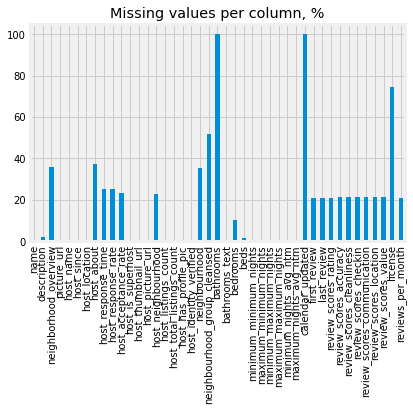

In [ ]:
# find percentage of missing values for each column
listing_missing_df = listing_df.isnull().mean() * 100

# filter out only columns, which have missing values
listing_columns_with_nan = listing_missing_df[listing_missing_df > 0]

# plot the results
listing_columns_with_nan.plot.bar(title = 'Missing values per column, %')

## --> Avoid choosing bathrooms, calendar_updated and license because they are missing at a high rate

##  ------------------------------------ FEATURES SELECTION ------------------------------------

In [ ]:
features = '''zipcode, id, name, host_id, neighbourhood, latitude, longitude, room_type, bedrooms, amenities, price, minimum_nights, availability_365, number_of_reviews, review_scores_rating, reviews_per_month'''
features = features.split(", ")
features_df = pd.DataFrame()
features_df['feature'] = features
display(features_df)

feature
0                zipcode
1                     id
2                   name
3                host_id
4          neighbourhood
5               latitude
6              longitude
7              room_type
8               bedrooms
9              amenities
10                 price
11        minimum_nights
12      availability_365
13     number_of_reviews
14  review_scores_rating
15     reviews_per_month

#### Create a new dataframe that only contains information of these selected features:

In [ ]:
feature_listing_df = pd.DataFrame()
for feature in features:
  feature_listing_df[feature] = listing_df[feature]

#### Get the shape of the new feature_listing_df:

In [ ]:
feature_listing_df.shape

(207006, 16)

#### Take a look at the first 3 data samples of feature_listing_df:

In [ ]:
display(feature_listing_df.head(3))

zipcode      id  ... review_scores_rating  reviews_per_month
0   28801  108061  ...                 4.49               0.73
1   28806  155305  ...                 4.57               5.43
2   28806  156805  ...                 4.52               2.80

[3 rows x 16 columns]

#### Remove 'United States' in the neighborhood to make it easy to separate:

In [ ]:
feature_listing_df['neighbourhood'] = feature_listing_df['neighbourhood'].str.replace(', United States', '')
display(feature_listing_df.head(3))

zipcode      id  ... review_scores_rating  reviews_per_month
0   28801  108061  ...                 4.49               0.73
1   28806  155305  ...                 4.57               5.43
2   28806  156805  ...                 4.52               2.80

[3 rows x 16 columns]

#### Show the statistics of features in the feature_listing_df:

In [ ]:
display(feature_listing_df.describe())

id       host_id  ...  review_scores_rating  reviews_per_month
count  2.070060e+05  2.070060e+05  ...         164137.000000      164137.000000
mean   3.142877e+07  1.165859e+08  ...              4.698886           2.637133
std    1.588514e+07  1.215028e+08  ...              0.618516           6.607274
min    1.090000e+02  2.300000e+01  ...              0.000000           0.010000
25%    1.842391e+07  1.746979e+07  ...              4.670000           0.320000
50%    3.390894e+07  6.622464e+07  ...              4.860000           1.070000
75%    4.626152e+07  1.869934e+08  ...              5.000000           2.890000
max    5.252932e+07  4.246855e+08  ...              5.000000         493.000000

[8 rows x 11 columns]

## --------------------------------- EVALUATE MISSING VALUES FOR REMOVING / FILLING ---------------------------------

#### Calculate the data type, the number of missing values and the percentage of missing values of each feature:

In [ ]:
feature_column_df = pd.DataFrame()
feature_column_df['feature'] = feature_listing_df.columns
feature_column_df['data_type'] = feature_listing_df.dtypes.values
feature_column_df['number_of_missing_values'] = feature_listing_df.isnull().sum().values
feature_column_df['missing_values_percentage'] = (feature_listing_df.isnull().sum().values / feature_listing_df.shape[0]) * 100
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
    display(feature_column_df)

feature data_type  number_of_missing_values  \
0                zipcode    object                         0   
1                     id     int64                         0   
2                   name    object                        19   
3                host_id     int64                         0   
4          neighbourhood    object                     73645   
5               latitude   float64                         0   
6              longitude   float64                         0   
7              room_type    object                         0   
8               bedrooms   float64                     21120   
9              amenities    object                         0   
10                 price   float64                         0   
11        minimum_nights     int64                         0   
12      availability_365     int64                         0   
13     number_of_reviews     int64                         0   
14  review_scores_rating   float64                     42869   
15     reviews_per_month   float64                     42869   

    missing_values_percentage  
0                    0.000000  
1                    0.000000  
2                    0.009178  
3                    0.000000  
4                   35.576263  
5                    0.000000  
6                    0.000000  
7                    0.000000  
8                   10.202603  
9                    0.000000  
10                   0.000000  
11                   0.000000  
12                   0.000000  
13                   0.000000  
14                  20.709062  
15                  20.709062

#### Show the frequency of missing values in each feature:

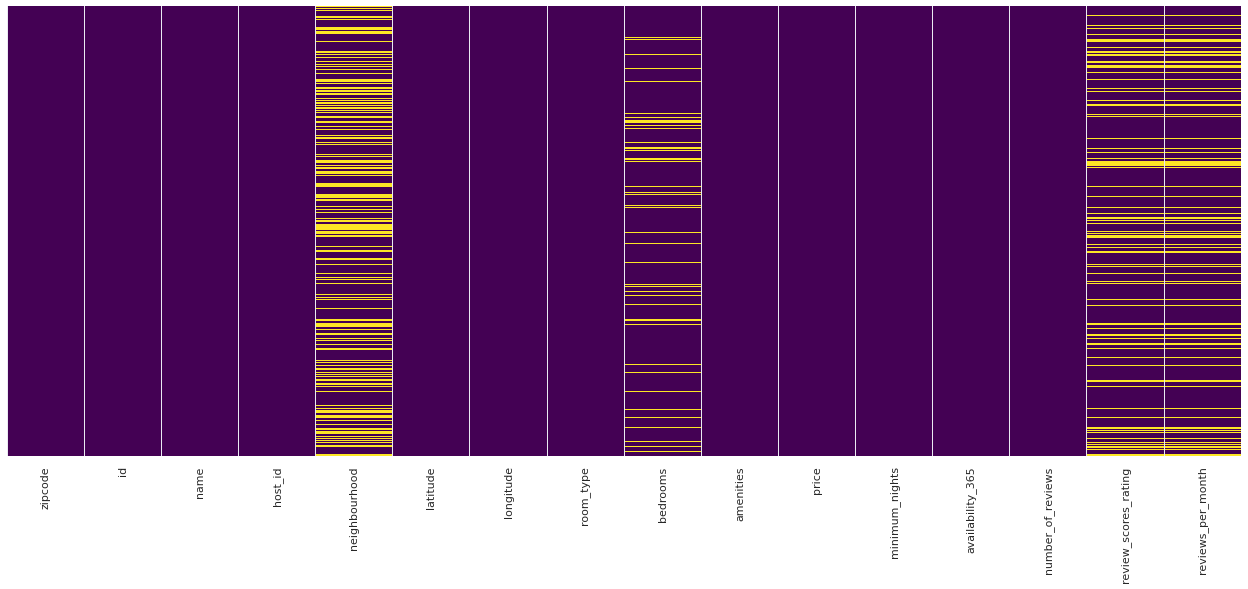

In [ ]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(feature_listing_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Show the percentage of missing values of features that have missing values:

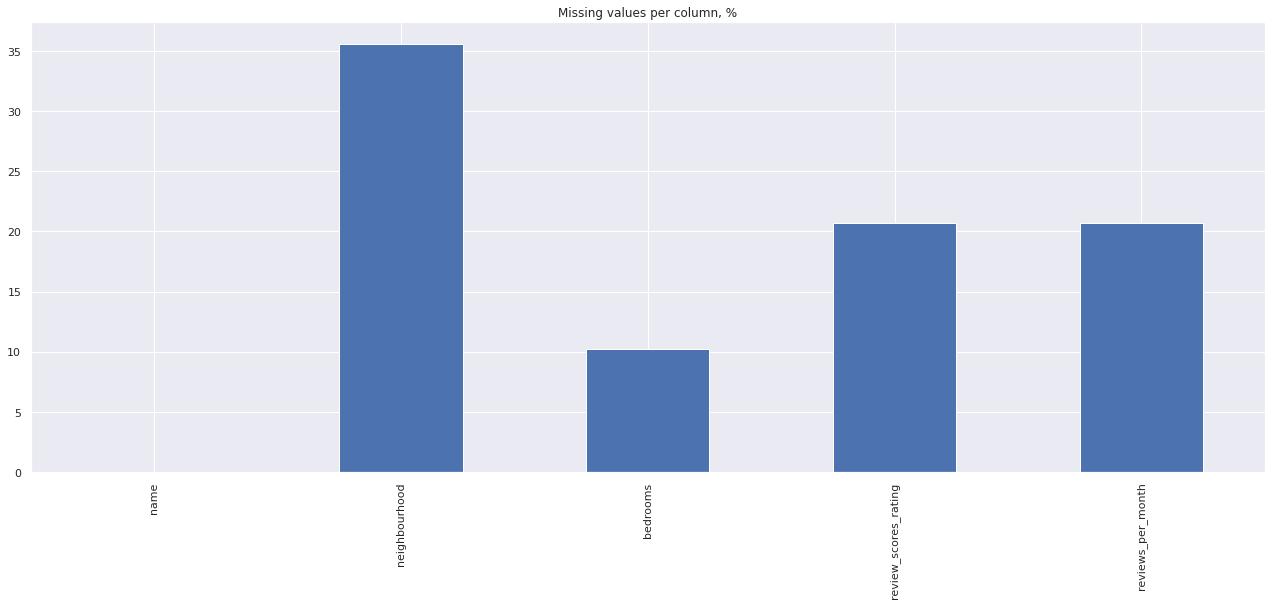

In [ ]:
# find percentage of missing values for each column
feature_listing_missing_df = feature_listing_df.isnull().mean() * 100

# filter out only columns, which have missing values
feature_listing_columns_with_nan = feature_listing_missing_df[feature_listing_missing_df > 0]

# plot the results
feature_listing_columns_with_nan.plot.bar(title = 'Missing values per column, %')

#### Fill missing values in the neighbourhood by propagating last valid observation forward to next valid (ffill):

In [ ]:
feature_listing_df['neighbourhood'].fillna(method = 'ffill', inplace = True)

#### Fill missing values in the bedrooms with mean values:

In [ ]:
feature_listing_df['bedrooms'].fillna(feature_listing_df['bedrooms'].mean(), inplace = True)

#### Fill missing values in the review_scores_rating by propagating last valid observation forward to next valid (ffill):

In [ ]:
feature_listing_df['review_scores_rating'].fillna(method = 'ffill', inplace = True)

#### Fill missing values in the reviews_per_month with mean values:

In [ ]:
feature_listing_df['reviews_per_month'].fillna(feature_listing_df['reviews_per_month'].mean(), inplace = True)

#### Show the frequency of missing values in each feature again: 

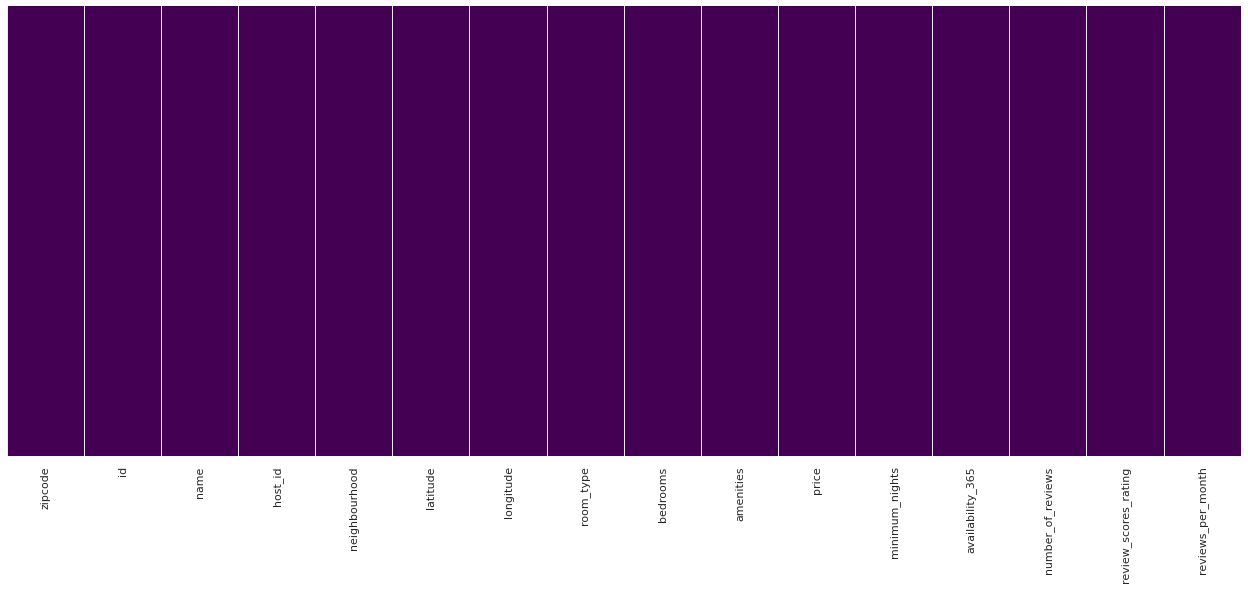

In [ ]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(feature_listing_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## --> We can see that there are no missing values now

## --------------------------------- EXPLORATORY DATA ANALYSIS ---------------------------------

## NAME OF LISTING
Name of the listing.

#### Show the words that appear most frequently in the name of listings:

<Figure size 720x432 with 0 Axes>

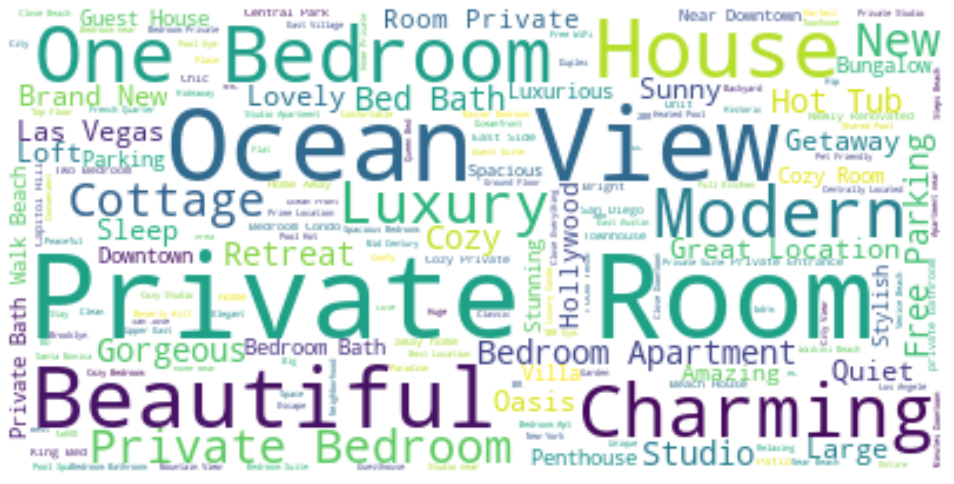

In [ ]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(each) for each in feature_listing_df.name)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words = 200, background_color = "white").generate(text)
plt.figure(figsize = (10,6))
plt.figure(figsize = (15,10))

# Display the generated image:
plt.imshow(wordcloud, interpolation = 'Bilinear')

plt.axis("off")
plt.show()

# --> We can see that some words that are most concerned are:

1.   PRIVATE ROOM
2.   OCEAN VIEW
3.   BEAUTIFUL
4.   ONE BEDROOM
5.   MODERN
6.   CHARMING
7.   LUXURY



#### Calculate the top 20 words that are most used in the name of listings:

In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_ = []
#getting name strings from the column and appending it to the list
for name in feature_listing_df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl = str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_ = []
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word = word.lower()
        _names_for_count_.append(word)
        
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_20_w = Counter(_names_for_count_).most_common()
_top_20_w = _top_20_w[0:20]


#now let's put our findings in dataframe for further visualizations
sub_w = pd.DataFrame(_top_20_w)
sub_w.rename(columns = {0:'Words', 1:'Count'}, inplace = True)
display(sub_w)

Words  Count
0          in  43294
1     private  22309
2          to  22245
3         the  22007
4        room  19039
5     bedroom  18812
6           -  18224
7           &  16432
8        with  15631
9        home  15347
10          2  14477
11     studio  14012
12      beach  12993
13  apartment  12913
14        and  12096
15       near  12017
16          |  11649
17       cozy  11579
18          1  11440
19         of  10180

#### Show the top 20 words that are most used in the name of listings:

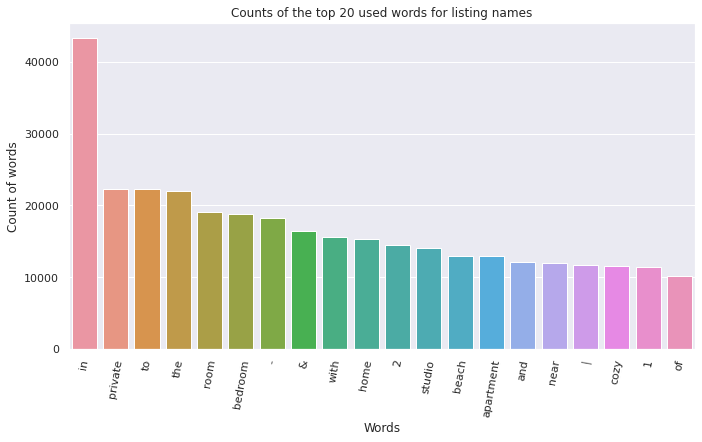

In [ ]:
plt.figure(figsize = (10, 6))
viz_5 = sns.barplot(x = 'Words', y = 'Count', data = sub_w)
viz_5.set_title('Counts of the top 20 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation = 80)

plt.show()

## --> We can see that people care about locations that are "private, have bedroom, studio, beach, apartment, and cozy locations"

## HOST ID
Airbnb's unique identifier for the host/user.

#### Find out the host id that have the highest number of listings:

In [ ]:
# Let's check which hosts (IDs) have the most listings on the Airbnb network and are using it.
top_host = feature_listing_df.host_id.value_counts().head(10)
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace = True)
top_host_df.rename(columns={'index': 'host_id', 'host_id': 'listing_count'}, inplace = True)
display(top_host_df)

host_id  listing_count
0  107434423           1891
1   48005494            845
2  194953121            608
3  368944610            476
4    5615582            450
5  226804666            403
6  132087088            397
7  111808435            323
8  305240193            307
9  359036978            289

## --> The host with the host_id "107434423" has the largest number of listings on Airbnb (1891 listings)

#### Visualize the host id that have the highest number of listings:

In [ ]:
#setting figure size for future visualizations
sns.set(rc = {'figure.figsize':(10,8)})
sns.set_style('white')

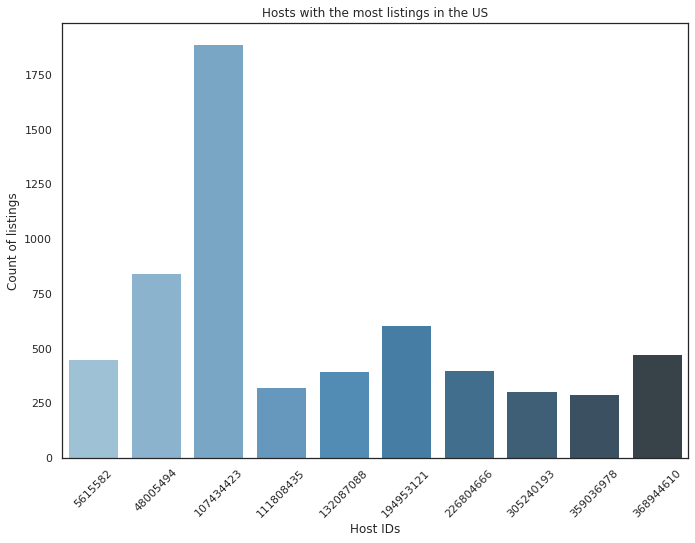

In [ ]:
viz_1 = sns.barplot(x = "host_id", y = "listing_count", data = top_host_df, palette = 'Blues_d')
viz_1.set_title('Hosts with the most listings in the US')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation = 45)

plt.show()

## --> The number of listings the host with the host_id "107434423" has far outstrips the rest of the competition.

## NEIGHBOURHOOD

#### Calculate the number of existing neighborhood in the data:

In [ ]:
len(feature_listing_df.neighbourhood.unique())

1313

## ZIPCODE

#### Calculate the number of existing zipcode in the data:

In [ ]:
len(feature_listing_df.zipcode.unique())

1637

## LATITUDE, LONGITUDE

#### Show listing locations on the US map:

In [ ]:
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(feature_listing_df['longitude'], feature_listing_df['latitude'])]
gdf = GeoDataFrame(feature_listing_df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

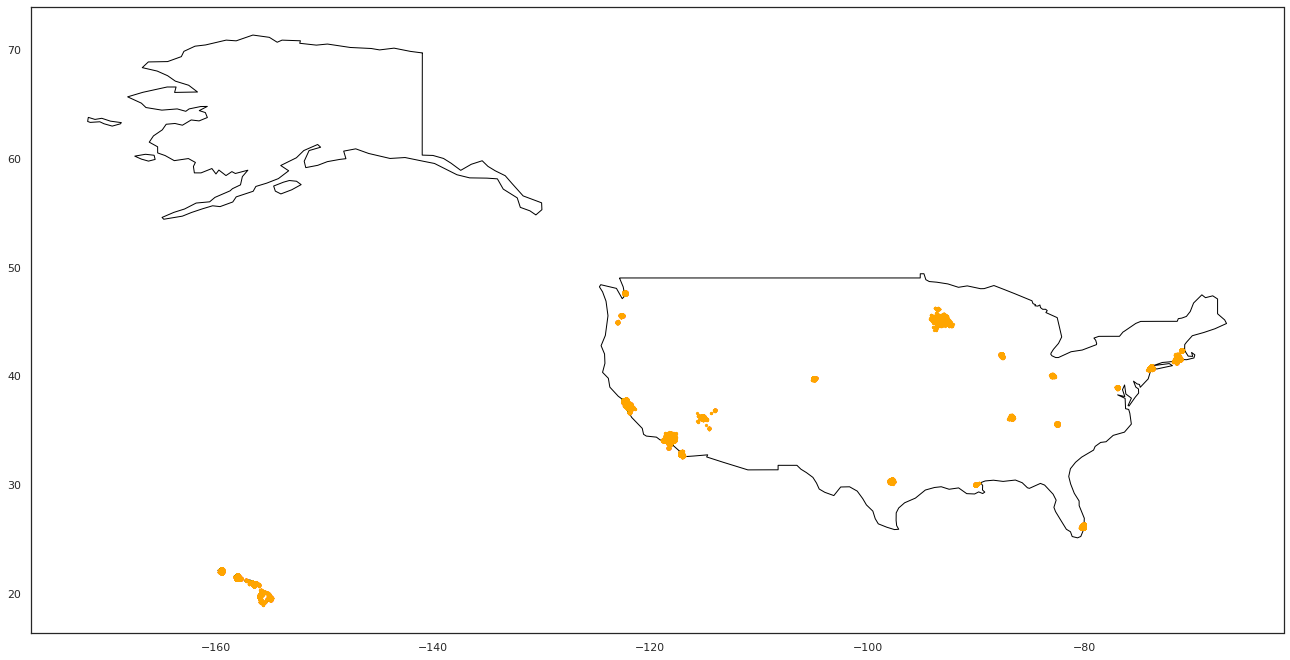

In [ ]:
ax = world[world.name == 'United States of America'].plot(figsize = (20, 60), color = 'white', edgecolor = 'black')
gdf.plot(ax=ax, marker = 'o', color='orange', markersize = 5)
plt.show()

## --> We can see that places which have a lot of listings are California, Chicago, Hawaii, New York.

## ROOM TYPE

All homes are grouped into the following four room types:

1. Entire place
2. Private room
3. Shared room
4. Hotel room

**Entire places** are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: ""Host occupies first floor of the home""), and provide further details on the listing.

**Private rooms** are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

**Shared rooms** are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays."

#### Calculate and visualize the percentage of different room types in the dataset:

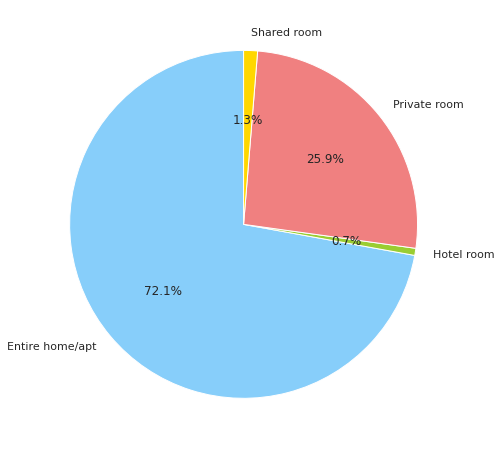

In [ ]:
room_df = feature_listing_df.groupby('room_type').size() / feature_listing_df['room_type'].count() * 100
labels = room_df.index
sizes = room_df.values
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'gold']

plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 90)
plt.show() 

## --> We can see that Entire home / apartment is most prefered and Hotel room is least preffered
## --> People care about renting the entire home / apartment and they don't like Hotel room

#### Calculate and visualize the price of each room type:

<Figure size 720x432 with 0 Axes>

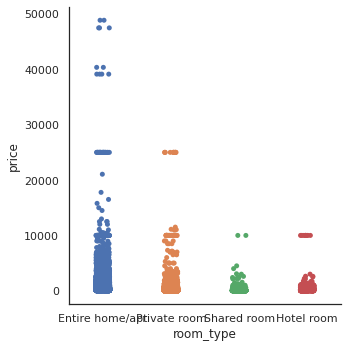

In [ ]:
# catplot room type and price
plt.figure(figsize = (10, 6))
sns.catplot(x = "room_type", y = "price", data = feature_listing_df);
plt.ioff()

## --> We can see that the majority of room types are below $10,000.

1.   Most "entire home / apartment" and "Private room" have the daily price under $10,000.

2.   Most  "Shared room" and "Hotel room" have the daily price under $5,000.

## BEDROOM

The number of bedrooms.

#### Calculate and visualize the number of bedrooms:

<function matplotlib.pyplot.show>

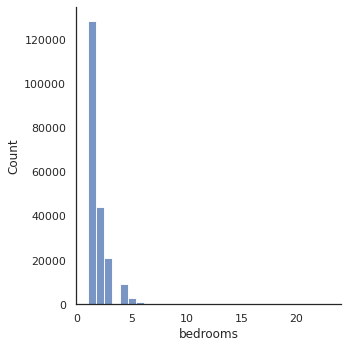

In [ ]:
sns.displot(feature_listing_df['bedrooms'], kde = False, bins = 30)
plt.show

## --> We can see that locations with single bed is the most preferred

## AMENITIES
What amenities hosts offer their guests, and determine which amenities that make a property more desirable.

#### Count the number of amenities that appear in the dataset:

In [ ]:
from collections import Counter

results = Counter()
feature_listing_df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[(' Smoke alarm', 175425),
 (' Wifi', 174199),
 (' Kitchen', 167114),
 (' Long term stays allowed', 165864),
 (' Hangers', 162389),
 (' Heating', 151840),
 (' Hair dryer', 151831),
 (' Air conditioning', 147528),
 (' Hot water', 144884),
 (' Essentials', 143501),
 (' Iron', 142236),
 (' Carbon monoxide alarm', 140509),
 (' Shampoo', 130288),
 (' Washer', 129344),
 (' Dishes and silverware', 126521),
 (' Coffee maker', 123699),
 (' Dedicated workspace', 123665),
 (' Microwave', 123101),
 (' Fire extinguisher', 122889),
 (' Refrigerator', 120936),
 (' Dryer', 116902),
 (' Cooking basics', 112081),
 (' Bed linens', 105167),
 (' Free parking on premises', 100012),
 (' Oven', 99726),
 (' TV', 99407),
 (' Private entrance', 99188),
 (' Stove', 94018),
 (' First aid kit', 89171),
 (' Free street parking', 81365)]

In [ ]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

#### Visualize the number of amenities that appear in the dataset:

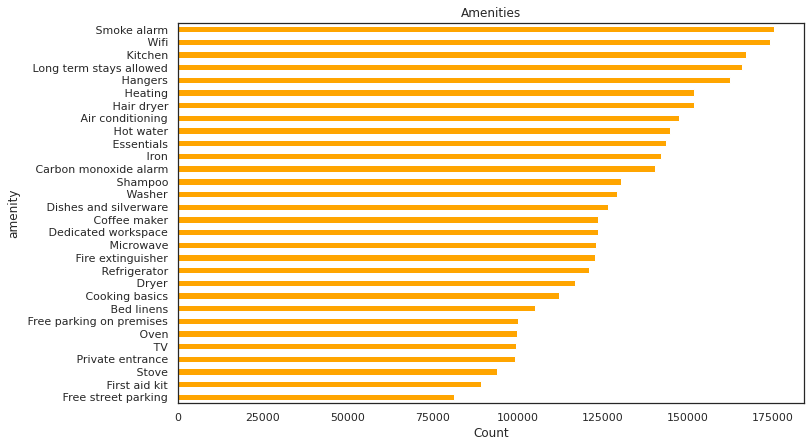

In [ ]:
# plot the Top 20
sub_df.sort_values(by = ['count'], ascending = True).plot(kind = 'barh', x = 'amenity', y = 'count',  
                                                      figsize=(10,7), legend = False, color = 'orange',
                                                      title = 'Amenities')
plt.xlabel('Count');

## --> We can see that people care about locations that have smoke alarm (to save their lives), wifi (to surf the internet), kitchen (to cook meals), long-term stays (in vacations), hangers, heating, hair dryer, air conditioning, hot water...

## PRICE
Daily price in local currency.

#### Visualize the price of listings in the dataset:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



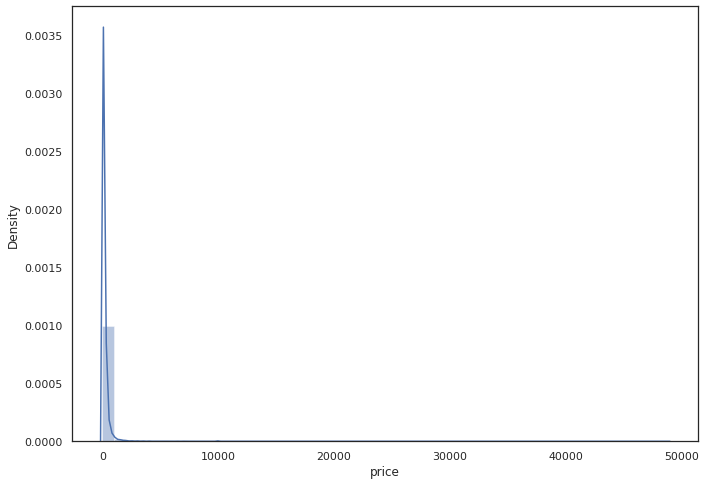

In [ ]:
sns.distplot(feature_listing_df["price"])

## --> We can see that most listings have the price under $500, and some rare listings that have higher price.

#### Calculate the min, max and mean of price of listings in the dataset:

In [ ]:
min_price = feature_listing_df['price'].min()
max_price = feature_listing_df['price'].max()
mean_price = feature_listing_df['price'].mean()

print(f'Minimum price per listing is {min_price}$.')
print(f'Maximum price per listing is {max_price}$')
print(f'Average price per listing is {mean_price:.2f}$.')

Minimum price per listing is 0.0$.
Maximum price per listing is 48864.0$
Average price per listing is 240.92$.


## --> We can see that most rental homes are affordable, with costs under $300 per day.

#### Remove outliers of price

In [ ]:
price_feature_listing_df = feature_listing_df.copy()
price_feature_listing_df['price'] = feature_listing_df['price'][feature_listing_df['price'].between(0, feature_listing_df['price'].quantile(.85))]

#### Visualize the price again:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



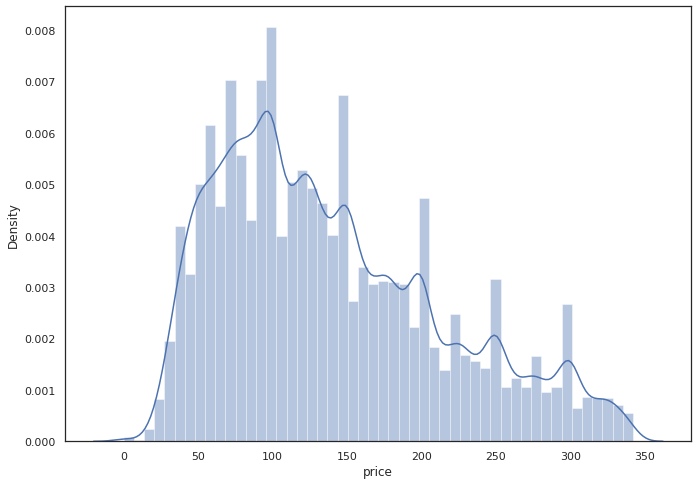

In [ ]:
sns.distplot(price_feature_listing_df["price"])

## --> Now we have a clearer view of how the price spreads throughout most of the listings.
## --> We can see that most listings offer the price of $90 per day.

#### Calculate the min, max and mean of price of listings in the dataset:

In [ ]:
min_price = price_feature_listing_df['price'].min()
max_price = price_feature_listing_df['price'].max()
mean_price = price_feature_listing_df['price'].mean()

print(f'Minimum price per listing is {min_price}$.')
print(f'Maximum price per listing is {max_price}$')
print(f'Average price per listing is {mean_price:.2f}$.')

Minimum price per listing is 0.0$.
Maximum price per listing is 342.0$
Average price per listing is 139.02$.


#### Visualize prices in longitude and latitude (far left is Hawaii, right is the entire US):

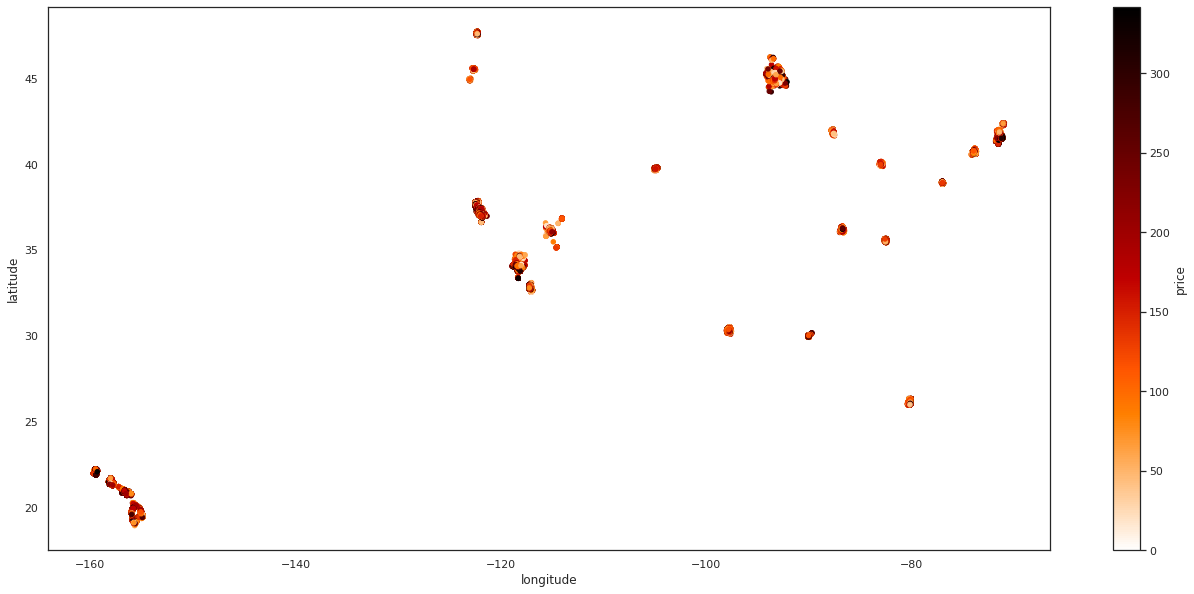

In [ ]:
price_feature_listing_df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 1, figsize = (20, 10), 
                        c = "price", cmap = "gist_heat_r", colorbar = True, sharex = False)

## --> We can see that places that are crowded will offer many listings with the highest prices. We can concentrate on these locations to find out the most profitable zipcode.

**Correlation between Price and Other Features**

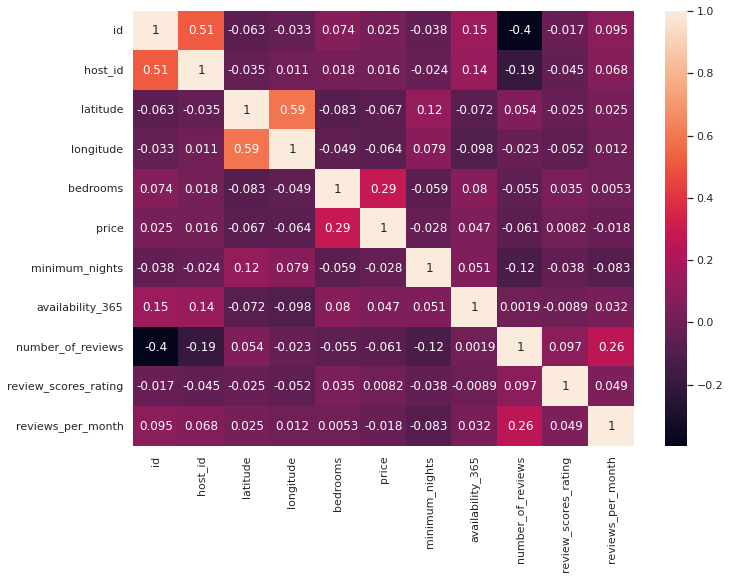

In [ ]:
corr_matrix = feature_listing_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# MINIMUM NIGHTS
Minimum number of night stay for the listing.

#### Visualize the minimum number of night stay for the listing:

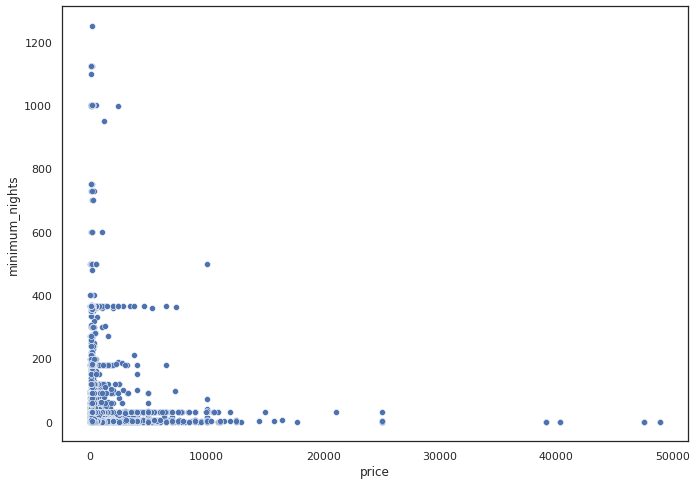

In [ ]:
sns.scatterplot(x = 'price',y = 'minimum_nights', data = feature_listing_df)

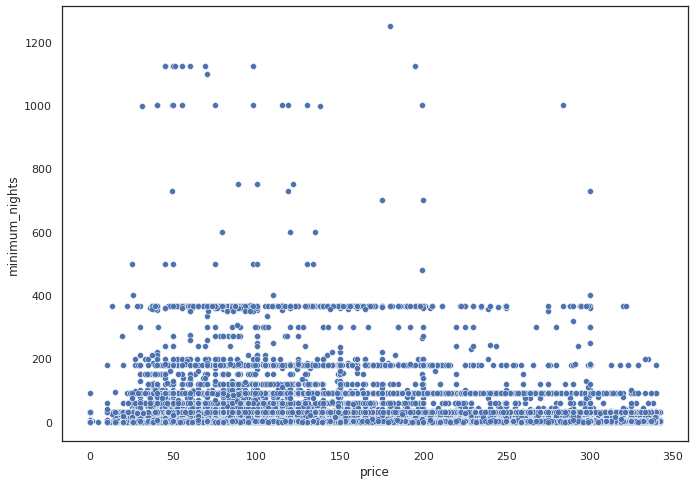

In [ ]:
sns.scatterplot(x = 'price',y = 'minimum_nights', data = price_feature_listing_df)

## --> We can see that most listings allow under 200 nights stay (6 months).

# ROOM AVAILABILITY

The availability of the listing x days in
the future as determined by the calendar. 


#### Visualize the room availability in 365 days according to longitude and latitude:

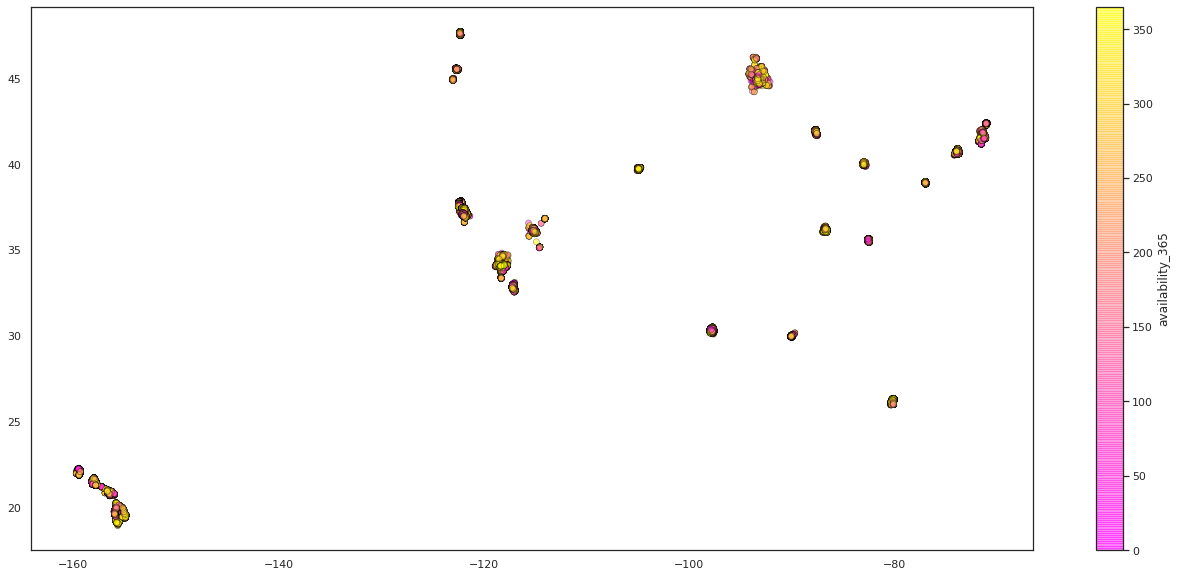

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(feature_listing_df.longitude, feature_listing_df.latitude, c=feature_listing_df.availability_365, cmap = 'spring', edgecolor = 'black', linewidth = 0.5, alpha = 0.5)

cbar = plt.colorbar()
cbar.set_label('availability_365')

## --> We can see that most listings are available over 200 days (6 months) in year.

#### Visualize the price of listings according to longitude and latitude:

<Figure size 1440x720 with 0 Axes>

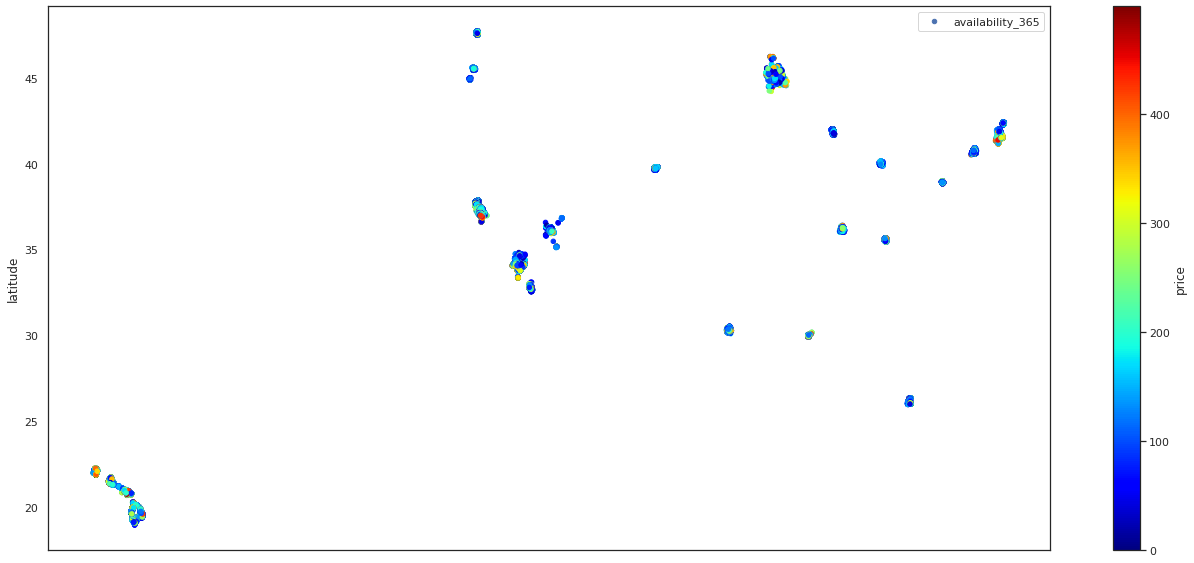

In [ ]:
plt.figure(figsize = (20, 10))
sub_6 = feature_listing_df[feature_listing_df.price < 500]
viz_4 = sub_6.plot(kind = 'scatter', x = 'longitude', y = 'latitude', label = 'availability_365', c = 'price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 1, figsize = (20, 10))
viz_4.legend()
plt.ioff()

## --> We can see that most listings offer affordable prices. Some places that have more visitors will offer listings with higher prices, such as Hawaii.

# NUMBER OF REVIEWS

The number of reviews the listing has.

#### Sort locations in decending order to find maximum number of reviews (most visited) then get the first 1000 locations:

In [ ]:
sorted_num_reviews_df = feature_listing_df.sort_values(by = ['number_of_reviews'], ascending = False).head(1000)
sorted_num_reviews_df = sorted_num_reviews_df.reset_index(drop = True)
sorted_num_reviews_df.head(10)

zipcode        id  ... reviews_per_month                     geometry
0   95003      8357  ...             13.85  POINT (-121.88547 37.00939)
1   60601  29819757  ...             55.73   POINT (-87.62734 41.89230)
2   80218   1733052  ...             15.52  POINT (-104.97219 39.73799)
3   97212   1260528  ...             19.81  POINT (-122.63062 45.54013)
4   28801    695196  ...             17.49   POINT (-82.55741 35.58131)
5   98117   3861673  ...             13.24  POINT (-122.37523 47.68551)
6   93950     89210  ...              9.43  POINT (-121.92721 36.60438)
7   10013  34071681  ...            117.43   POINT (-74.00794 40.72440)
8   93950     44515  ...             17.92  POINT (-121.93491 36.62475)
9   78723    949922  ...             12.65   POINT (-97.67919 30.29792)

[10 rows x 17 columns]

#### Visualize 1000 locations which have the highest number of reviews:

In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
Lat = 37.0902
Long = -95.7129
map_sorted_num_reviews_df = folium.Map([Lat, Long], zoom_start = 3)

map_sorted_num_reviews_df_rooms_map = plugins.MarkerCluster().add_to(map_sorted_num_reviews_df)

for lat,lon,label in zip(sorted_num_reviews_df.latitude, sorted_num_reviews_df.longitude, sorted_num_reviews_df.name):
    folium.Marker(location = [lat,lon],icon = folium.Icon(icon = 'home'), popup = label).add_to(map_sorted_num_reviews_df_rooms_map)
map_sorted_num_reviews_df.add_child(map_sorted_num_reviews_df_rooms_map)

map_sorted_num_reviews_df

## --> We can see that states that are most visited are California, Washington, New York, Tennessee and North Carolina, based on number of reviews.

## ------------------------------------------------------------------------------------------------------------------------------------------------
## ------------------------------------ FIND THE MOST PROFITABLE PROPERTIES ------------------------------------ 
## ------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
profit_df = sorted_num_reviews_df.copy()

profit_df.insert(1, "profit_score", sorted_num_reviews_df['price'] * sorted_num_reviews_df['number_of_reviews'])

profit_df['profit_score'] = profit_df['profit_score'].round(decimals = 3)

sorted_profit_df = profit_df.sort_values(by = 'profit_score', ascending = False)

sorted_profit_df = sorted_profit_df.reset_index(drop = True)

In [ ]:
display(sorted_profit_df.head(10))

zipcode  profit_score  ...  reviews_per_month                     geometry
0   89103      382354.0  ...               8.99  POINT (-115.19907 36.11441)
1   60601      251547.0  ...              55.73   POINT (-87.62734 41.89230)
2   95003      249132.0  ...              13.85  POINT (-121.88547 37.00939)
3   96771      218100.0  ...               9.79  POINT (-155.15019 19.49577)
4   94044      203845.0  ...               8.00  POINT (-122.47707 37.63542)
5   92102      196650.0  ...               6.28  POINT (-117.12960 32.72394)
6   93950      191600.0  ...              17.92  POINT (-121.93491 36.62475)
7   90265      189875.0  ...               9.15  POINT (-118.86987 34.09261)
8   02127      184516.0  ...               7.77   POINT (-71.05395 42.33570)
9   95003      183977.0  ...               5.83  POINT (-121.90045 36.96805)

[10 rows x 18 columns]

In [ ]:
display(f'The zipcode of the most profitable properties is: {sorted_profit_df.iloc[0, 0]}')

'The zipcode of the most profitable properties is: 89103'

## --> The zipcode of the most profitable properties is 89103

## --> We guess Top 5 most profitable properties are in:
1. Las Vegas, Nevada
2. Chicago, Illinois
3. Aptos, California
4. Fern Forest, Hawaii
5. Pacifica, California

## --> Most of them are in the west of the United States.

## --> AMAZING LAS VEGAS PENTHOUSE PALMS PLACE: https://www.airbnb.com/rooms/19031301?guests=1&adults=1&s=67&unique_share_id=cf39345d-ae9e-43ed-854d-e7d540b5d6b5

## --> Read the reviews and other information to verify this is a perfect place with a perfect host.

## --> Among Top 10 most profitable properties, California is the state that have a lot of most profitable properties. The map also shows that California is the state that have lots of reviews. So we guess the most profitable zipcode is also in California. We will verify this guess in later steps.

## ------------------------------------------------------------------------------------------------------------------------------------------------
## ------------------------------------ FIND THE MOST PROFITABLE ZIPCODE ------------------------------------ 
## ------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
profit_zipcode_df = feature_listing_df.copy()

profit_zipcode_df.insert(1, "profit_score", profit_zipcode_df['price'] * profit_zipcode_df['number_of_reviews'])

profit_zipcode_df = profit_zipcode_df.groupby('zipcode', as_index = False).agg(total_profit_score = ('profit_score', np.sum))

profit_zipcode_df = profit_zipcode_df.sort_values(by = 'total_profit_score', ascending = False)

profit_zipcode_df = profit_zipcode_df.reset_index(drop = True)

In [ ]:
display(profit_zipcode_df.head(10))

zipcode  total_profit_score
0   92109          27442090.0
1   96753          19196391.0
2   70116          17097910.0
3   96761          14713741.0
4   90291          14321146.0
5   78704          13596990.0
6   92107          13551243.0
7   89109          12839133.0
8   78701          12524881.0
9   28801          12477076.0

In [ ]:
display(f'The most profitable zipcode is: {profit_zipcode_df.iloc[0, 0]}')

'The most profitable zipcode is: 92109'

## --> The most profitable zipcode is: 92109

## --> Check on zipcode finding websites:

https://www.getzips.com/zip.htm

https://tools.usps.com/zip-code-lookup.htm?citybyzipcode

https://www.unitedstateszipcodes.org/

## --> The zipcode is in San Diego, California. So we guess it right!

## --------------------------------- PRICE PREDICTIONS USING MACHINE LEARNING MODEL ---------------------------------

In [ ]:
feature_column_df = pd.DataFrame()
feature_column_df['feature'] = feature_listing_df.columns
feature_column_df['data_type'] = feature_listing_df.dtypes.values
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None, 'display.max_colwidth', None):
  display(feature_column_df)

feature data_type
0                zipcode    object
1                     id     int64
2                   name    object
3                host_id     int64
4          neighbourhood    object
5               latitude   float64
6              longitude   float64
7              room_type    object
8               bedrooms   float64
9              amenities    object
10                 price   float64
11        minimum_nights     int64
12      availability_365     int64
13     number_of_reviews     int64
14  review_scores_rating   float64
15     reviews_per_month   float64
16              geometry  geometry

#### Get only numeric features to put into the models

In [ ]:
numeric_condition_1 = feature_column_df['data_type'] != 'object'
numeric_condition_2 = feature_column_df['data_type'] != 'geometry'
numeric_feature_column_df = feature_column_df.loc[(numeric_condition_1) & (numeric_condition_2)]
numeric_feature_column_df.reset_index(drop = True, inplace = True)

display(numeric_feature_column_df)

feature data_type
0                     id     int64
1                host_id     int64
2               latitude   float64
3              longitude   float64
4               bedrooms   float64
5                  price   float64
6         minimum_nights     int64
7       availability_365     int64
8      number_of_reviews     int64
9   review_scores_rating   float64
10     reviews_per_month   float64

#### Create a numeric_feature_listing_df:

In [ ]:
numeric_feature_listing_df = pd.DataFrame()
for feature in numeric_feature_column_df['feature']:
  numeric_feature_listing_df[feature] = feature_listing_df[feature]

In [ ]:
display(numeric_feature_listing_df.shape)

(207006, 11)

In [ ]:
X = numeric_feature_listing_df.drop(["price"], axis = 1)

y = numeric_feature_listing_df["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_train_preds = linear_reg.predict(X_train)
y_test_preds = linear_reg.predict(X_test)

In [1]:
from sklearn.metrics import r2_score, mean_squared_error

print('Linear Regression MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Linear Regression R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

NameError: ignored

Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

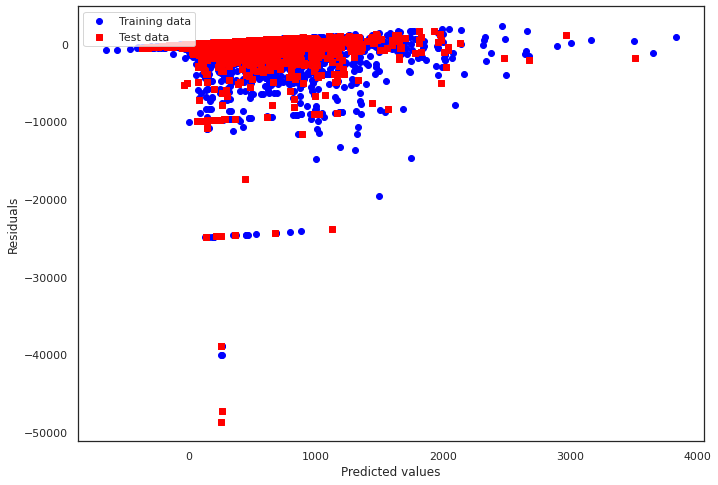

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5)

dtree.fit(X_train,y_train)

y_train_preds = dtree.predict(X_train)
y_test_preds = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('Decision Tree MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Decision Tree R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Decision Tree MSE train: 328616.156, test: 403920.103
Decision Tree R^2 train: 0.147, test: 0.108


Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

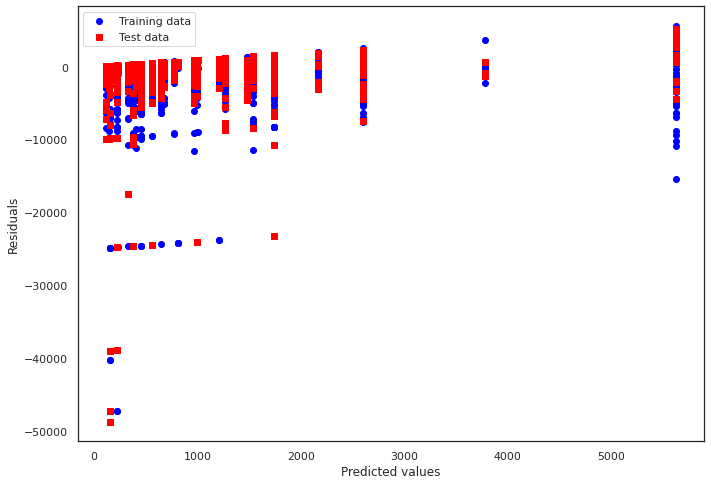

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X, y)

y_train_preds = knn.predict(X_train)
y_test_preds = knn.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('K Nearest Neighbours MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('K Nearest Neighbours R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

K Nearest Neighbours MSE train: 0.000, test: 0.000
K Nearest Neighbours R^2 train: 1.000, test: 1.000


Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

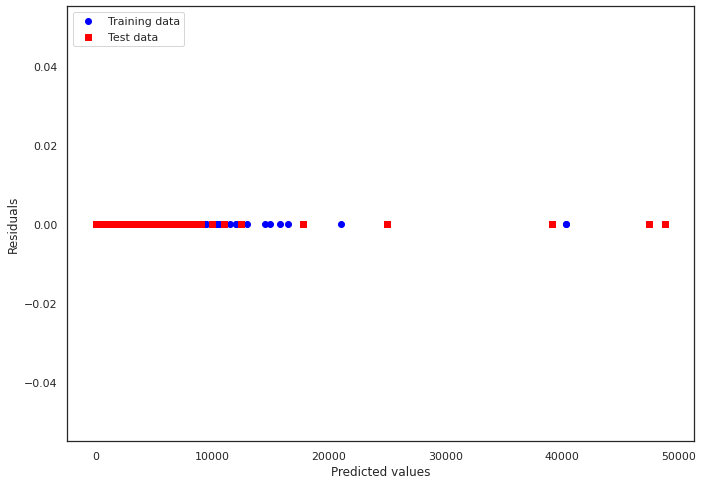

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

Apply machine learning methods to see which features in dataset influence the price the most. In order to do this we will train two popular models (Random Forest regressor and XGBoost regressor) based on decision trees and look at resulting feature importances.

In [ ]:
TEST_SIZE = 0.3
RAND_STATE = 0

X = numeric_feature_listing_df.drop(columns = 'price')

y = numeric_feature_listing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

Train Random Forest Regressor model to predict price:

In [ ]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                              #  criterion='mse', 
                               random_state=RAND_STATE)
                              #  n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 32832.664, test: 244568.729
Random Forest R^2 train: 0.915, test: 0.429


Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

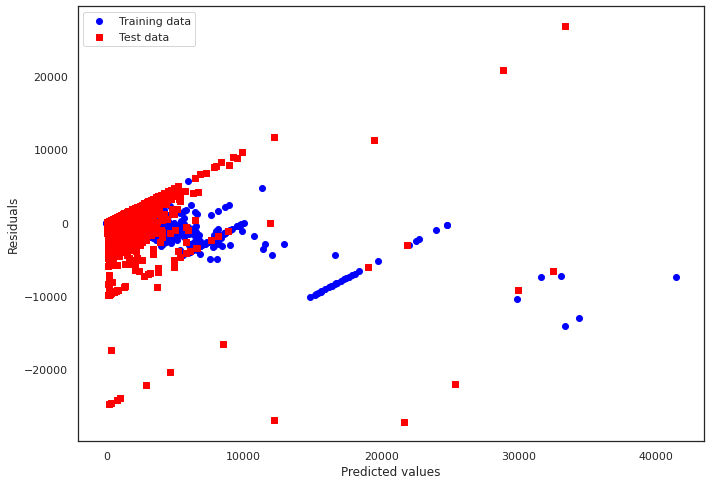

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

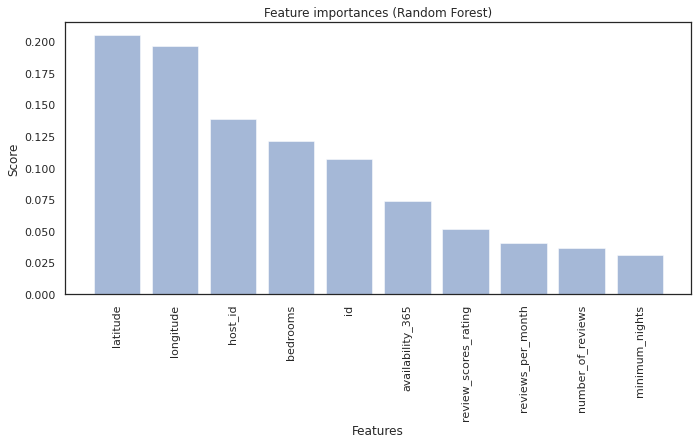

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')
 
plt.show()

Train XGBoost Regressor model to predict price:

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [ ]:
import xgboost

#train XGBoost model
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

[19:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

MSE train: 124562.931, test: 242405.204
R^2 train: 0.677, test: 0.434


Mean squared error (MSE) is the average of sum of squared difference between actual value and the predicted or estimated value.

The value of MSE is always positive or greater than zero. A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.

R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. Greater the value of R-Squared, better is the regression model.

For the training dataset, the R-Squared is bounded between 0 and 1. If the value of R-Squared is 1, the model fits the data perfectly with a corresponding MSE = 0.

https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/

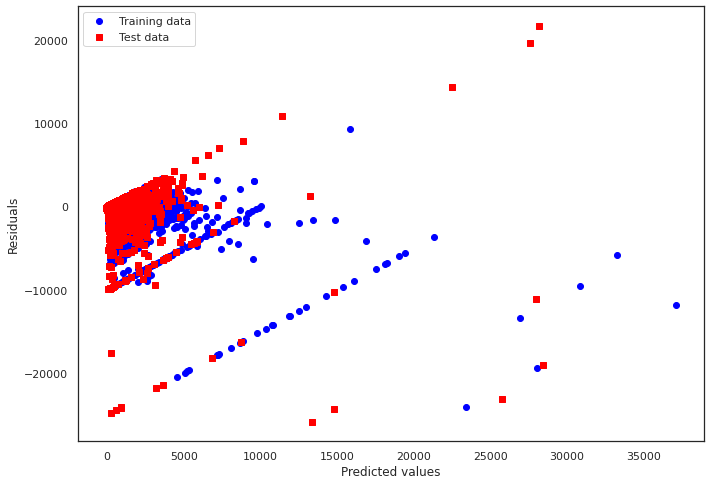

In [ ]:
plt.scatter(y_train_preds,  y_train_preds - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,
            c='red', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

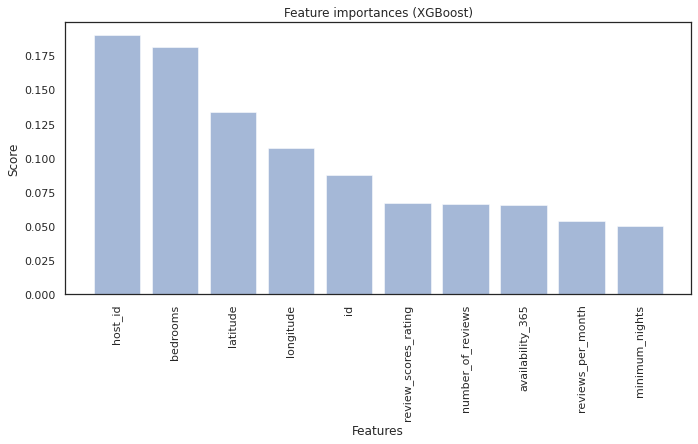

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = xgb_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')
 
plt.show()

## --> We can see that factors have influence on price: longitude, latitude, bedrooms, host_id
## The pricing might depend on reviews: review_scores_rating and number_of_reviews.